<a href="https://colab.research.google.com/github/Sirfowahid/DL_Project_01/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
from sklearn.model_selection import train_test_split
display.set_matplotlib_formats('svg')

In [2]:
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

labels = data[:,0]
data = data[:,1:]

data.shape,labels.shape

((20000, 784), (20000,))

In [3]:
labels

array([6., 5., 7., ..., 2., 9., 5.])

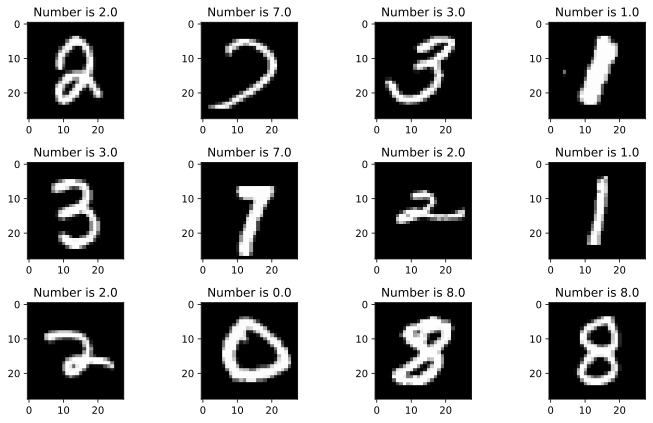

In [4]:
fig,axs = plt.subplots(3,4,figsize=(10,6))

for ax in axs.flatten():
  index = np.random.randint(low=0,high=data.shape[0])
  img = np.reshape(data[index,:],(28,28))
  ax.imshow(img,cmap='gray')
  ax.set_title(f'Number is {labels[index]}')
plt.tight_layout()
plt.show()

In [5]:
dataT = torch.tensor(data/np.max(data)).float()
labelsT = torch.tensor(labels).long()

dataT.max()


tensor(1.)

In [6]:
train_data,test_data,train_labels,test_labels = train_test_split(dataT,labelsT,test_size=.1)

train_dataset = TensorDataset(train_data,train_labels)
test_dataset = TensorDataset(test_data,test_labels)

batchsize = 32
train_loader = DataLoader(train_dataset,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader = DataLoader(test_dataset,batch_size=test_dataset.tensors[0].shape[0])

In [7]:
def createClassifier():
  class classifierNetwork(nn.Module):
    def __init__(self):
      super().__init__()
      self.input = nn.Linear(784,256)
      self.fc1 = nn.Linear(256,128)
      self.fc2 = nn.Linear(128,64)
      self.fc3 = nn.Linear(64,32)
      self.output = nn.Linear(32,10)

    def forward(self,x):
      x = F.relu(self.input(x))
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.relu(self.fc3(x))
      return self.output(x)
  
  classifier = classifierNetwork()
  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(classifier.parameters(),lr=0.01)

  return classifier,lossfun,optimizer

In [8]:
def trainClassifierNetwork():

  classifier,lossfun,optimizer = createClassifier()

  numepochs = 30
  trainAcc = []
  testAcc = []
  losses = torch.zeros(numepochs,2)

  for epochi in range(numepochs):

    batchLoss = []
    batchAcc = []

    for X,y in train_loader:

      yHat = classifier(X)
      loss = lossfun(yHat,y)
      batchLoss.append(loss.item())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()))
    
    losses[epochi,0] = np.mean(batchLoss)
    trainAcc.append(np.mean(batchAcc))
    
    X,y = next(iter(test_loader))
    with torch.no_grad():
      yHat = classifier(X)
      loss = lossfun(yHat,y)
      losses[epochi,1] = loss.item()
    
    testAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()))

  return classifier,losses,trainAcc,testAcc


In [9]:
classifier,losses,trainAcc,testAcc = trainClassifierNetwork()

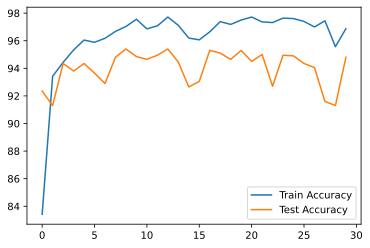

In [10]:
plt.plot(trainAcc)
plt.plot(testAcc)
plt.legend(['Train Accuracy','Test Accuracy'])
plt.show()

In [11]:
def createClassifier():
  class classifierNetwork(nn.Module):
    def __init__(self):
      super().__init__()
      self.input = nn.Linear(784,128)
      self.fc1 = nn.Linear(128,64)
      self.fc2 = nn.Linear(64,32)
      self.output = nn.Linear(32,10)

    def forward(self,x):
      x = F.relu(self.input(x))
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      return self.output(x)
  
  classifier = classifierNetwork()
  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(classifier.parameters(),lr=0.001)

  return classifier,lossfun,optimizer

In [12]:
def trainClassifierNetwork():

  classifier,lossfun,optimizer = createClassifier()

  numepochs = 30
  trainAcc = []
  testAcc = []
  losses = torch.zeros(numepochs,2)

  for epochi in range(numepochs):

    batchLoss = []
    batchAcc = []

    for X,y in train_loader:

      yHat = classifier(X)
      loss = lossfun(yHat,y)
      batchLoss.append(loss.item())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()))
    
    losses[epochi,0] = np.mean(batchLoss)
    trainAcc.append(np.mean(batchAcc))
    
    X,y = next(iter(test_loader))
    with torch.no_grad():
      yHat = classifier(X)
      loss = lossfun(yHat,y)
      losses[epochi,1] = loss.item()
    
    testAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()))

  return classifier,losses,trainAcc,testAcc


In [13]:
classifier,losses,trainAcc,testAcc = trainClassifierNetwork()

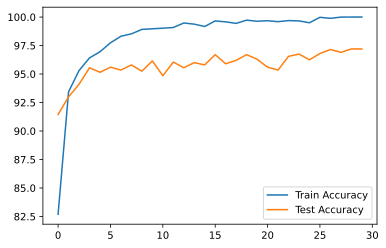

In [14]:
plt.plot(trainAcc)
plt.plot(testAcc)
plt.legend(['Train Accuracy','Test Accuracy'])
plt.show()

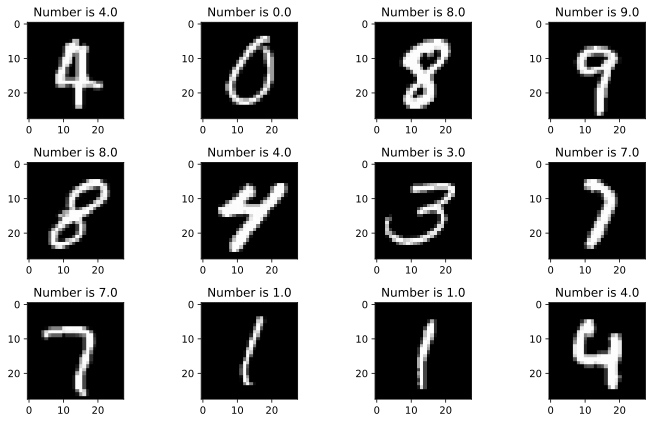

In [15]:
fig,axs = plt.subplots(3,4,figsize=(10,6))

for ax in axs.flatten():
  index = np.random.randint(low=0,high=data.shape[0])
  
  img = np.reshape(data[index,:],(28,28))
  ax.imshow(img,cmap='gray')
  ax.set_title(f'Number is {labels[index]}')
plt.tight_layout()
plt.show()

In [16]:
X,y = next(iter(test_loader))
predictions = classifier(X).detach()

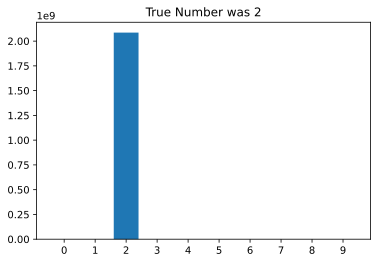

In [17]:
RandomSelectionRange = 100
plt.bar(range(10),np.exp(predictions[RandomSelectionRange]))
plt.xticks(range(10))
plt.title(f'True Number was {y[RandomSelectionRange].item()}')
plt.show()

[  44  146  160  162  170  184  197  206  304  480  490  531  550  567
  606  641  652  671  673  705  754  797  800  903  983 1000 1001 1040
 1127 1133 1172 1177 1196 1205 1210 1219 1246 1286 1340 1343 1426 1430
 1459 1470 1508 1521 1545 1546 1643 1646 1697 1741 1747 1774 1816 1831]


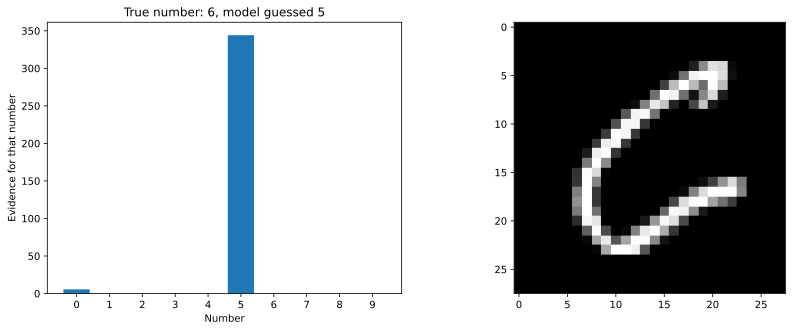

In [19]:
 # find the errors
errors = np.where( torch.max(predictions,axis=1)[1] != y )[0]
print(errors)

# Evidence for all numbers from one sample
sample2show = 14

fig,ax = plt.subplots(1,2,figsize=(14,5))

ax[0].bar(range(10),np.exp(predictions[errors[sample2show]]))
ax[0].set_xticks(range(10))
ax[0].set_xlabel('Number')
ax[0].set_ylabel('Evidence for that number')
ax[0].set_title('True number: %s, model guessed %s' 
                %( y[errors[sample2show]].item(), torch.argmax(predictions[errors[sample2show]]).item() ))

ax[1].imshow( np.reshape(X[errors[sample2show],:],(28,28)) ,cmap='gray')

plt.show()